## Analysis of the data - Traffic Volume from Quebec

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from traffic import count_files

In [2]:
# preview analysis of how much data for year we have per aggregated files and count files

# Specify the folder path
folder_path = '/media/disk3/Data3/QuebecTrafficVolumes/debit_circulation_quebec'  
# Get the list of subdirectories
subfolders = next(os.walk(folder_path))[1]

# Print the number of subfolders
print(f"The folder '{folder_path}' contains {len(subfolders)} subfolders.")



The folder '/media/disk3/Data3/QuebecTrafficVolumes/debit_circulation_quebec' contains 4889 subfolders.


Function section

In [3]:
# Using the count_files function to count the subfolders and the files
aggregated_folder_count, aggregated_file_count = count_files(folder_path, subfolders, separator='_', suffix='.xlsx')
count_folder_count, count_file_count = count_files(folder_path, subfolders, separator='-', suffix='donnees')

# Print the counts
print(f"Number of subfolders with aggregated files: {aggregated_folder_count}")
print(f"Total number of aggregated files: {aggregated_file_count}")

print(f"Number of subfolders with count files: {count_folder_count}")
print(f"Total number of count files: {count_file_count}")

Number of subfolders with aggregated files: 649
Total number of aggregated files: 3956
Number of subfolders with count files: 4851
Total number of count files: 10436


> So the results shows that we can have sections with only subdolders of count files (données). And we have 650 sections with aggregated files

In [20]:
# Initialize dictionaries to store the counts per year
aggregated_files_per_year = {}
count_files_per_year = {}

# Iterate over subfolders
for subfolder in subfolders:
    # Get the list of files in the subfolder
    files = os.listdir(os.path.join(folder_path, subfolder))
    
    # Iterate over files in the subfolder
    for file in files:
        # Check if it's an aggregated file
        if file.startswith(subfolder) and '_' in file:
            year = file.split('_')[-1].split('.')[0]
            if year in aggregated_files_per_year:
                aggregated_files_per_year[year] += 1
            else:
                aggregated_files_per_year[year] = 1
        # Check if it's a count file
        if file.startswith(subfolder) and '-' in file and 'donnees' in file:
            year = file.split('-')[-2]
            if year in count_files_per_year:
                count_files_per_year[year] += 1
            else:
                count_files_per_year[year] = 1

# Print the counts per year for aggregated files
print("Aggregated Files per Year:")
for year, count in sorted(aggregated_files_per_year.items()):
    print(f"Year {year}: {count}")

# Print the counts per year for count files
print("Count Files per Year:")
for year, count in sorted(count_files_per_year.items()):
    print(f"Year {year}: {count}")

Aggregated Files per Year:
Year 2014: 359
Year 2015: 426
Year 2016: 454
Year 2017: 479
Year 2018: 484
Year 2019: 518
Year 2020: 485
Year 2021: 466
Year 2022: 292
Count Files per Year:
Year 2018: 2369
Year 2019: 2395
Year 2020: 1767
Year 2021: 1961
Year 2022: 1949


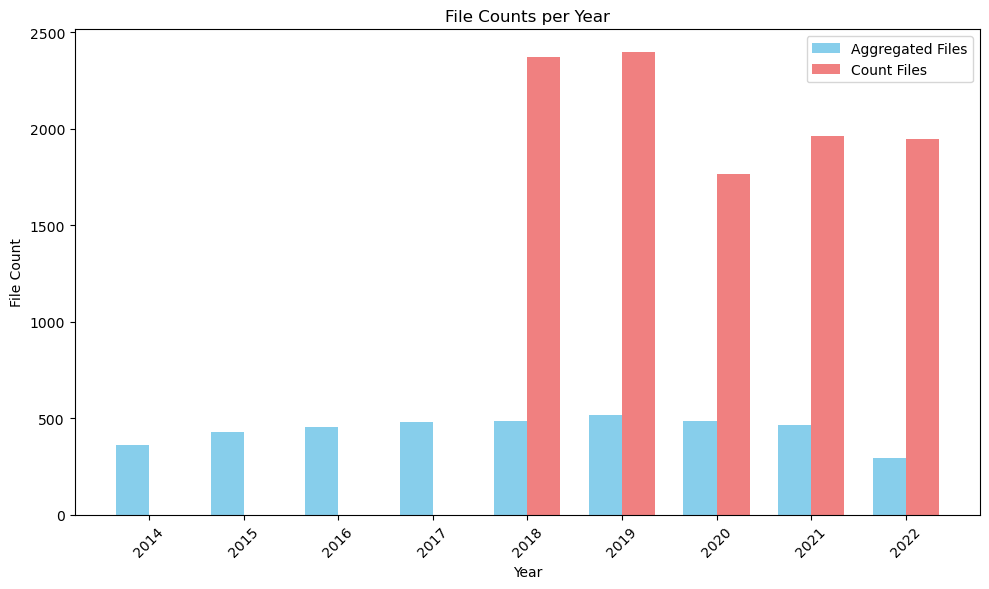

In [8]:
# Extract years and corresponding counts
years = sorted(set(aggregated_files_per_year.keys()) | set(count_files_per_year.keys()))
aggregated_counts = [aggregated_files_per_year.get(year, 0) for year in years]
count_counts = [count_files_per_year.get(year, 0) for year in years]

# width of the bars
bar_width = 0.35

# Generate the x-axis positions for the bars
x = np.arange(len(years))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, aggregated_counts, width=bar_width, color='skyblue', label='Aggregated Files')
plt.bar(x + bar_width/2, count_counts, width=bar_width, color='lightcoral', label='Count Files')
plt.xlabel('Year')
plt.ylabel('File Count')
plt.title('File Counts per Year')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Analysis using the files from the folders

> histo - Historique des années antérieures (History of previous years)

> fact84 - Moyenne des débits horaires par jour de semaine par mois (Average hourly flow per weekday per month)

> horaire - Répartition horaire journalière (Daily time distribution)


Function section

In [75]:
def aggregate_filtered_data(folder_path, subfolders, filter_column, filter_values, sheet_name):
    # Initialize a DataFrame to store all aggregated files' data
    aggregated_data = pd.DataFrame()

    # Iterate over subfolders
    for subfolder in subfolders:
        # Get the list of files in the subfolder
        files = os.listdir(os.path.join(folder_path, subfolder))

        # Iterate over files in the subfolder
        for file in files:
            # Check if it's an aggregated file
            if file.startswith(subfolder) and '_' in file:
                # Read the Excel file
                filepath = os.path.join(folder_path, subfolder, file)
                
                # Read the specified sheet with filter on the specified column
                filtered_df = read_filtered_excel(filepath, sheet_name, filter_column, filter_values)
                
                if filtered_df is not None:
                    # Append filtered data to the aggregated_data DataFrame
                    aggregated_data = aggregated_data.append(filtered_df, ignore_index=True)

    return aggregated_data

In [77]:
%%capture
# Call the aggregate_filtered_data function
aggregated_data = aggregate_filtered_data(folder_path, subfolders, 'VOIE', [13], 'histo')


In [79]:

%%capture
# Create a new DataFrame with unique values based on 'SECTN' and 'ANNEE' columns
aggregated_data_filtered = aggregated_data.drop_duplicates(subset=['SECTN', 'ANNEE'], keep='first')
# Calculate the average of 'DJMA', 'DJME', and 'DJMH' for all years
averages = aggregated_data_filtered.groupby('ANNEE')['DJMA', 'DJME', 'DJMH'].mean()

##### Plot Average of DJMA, DJME and DJMH per year

Data from the histo tab in the spreadsheets of the aggregated data. 

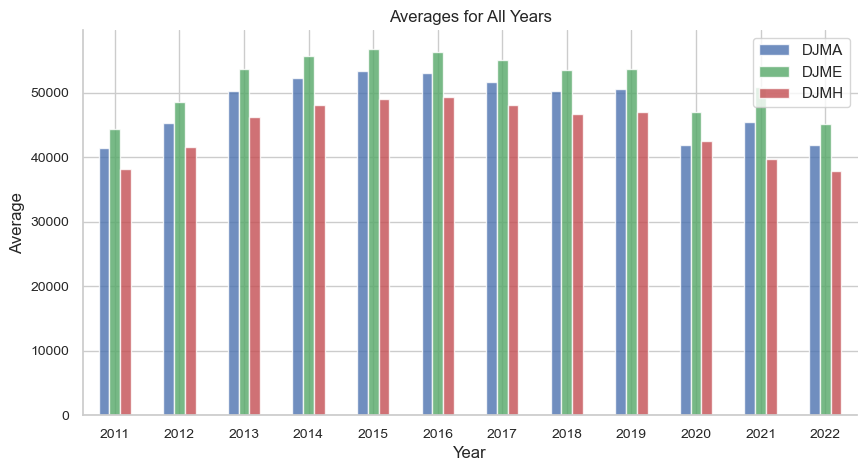

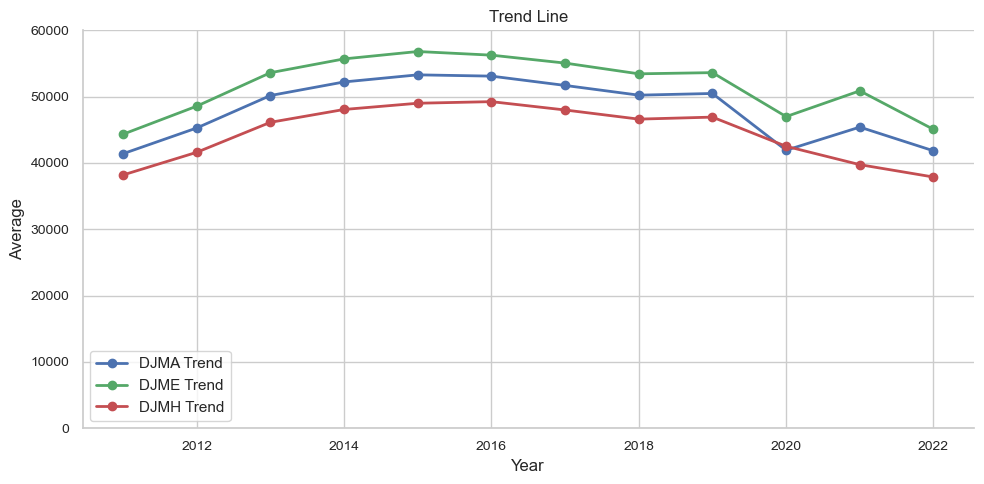

In [200]:
# Set seaborn style
sns.set(style='whitegrid')

# Create a figure and axis objects for the bar plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
averages.plot(kind='bar', ax=ax, color=['#4C72B0', '#55A868', '#C44E52'], alpha=0.8)

# Set the title and axis labels for the bar plot
ax.set_title('Averages for All Years', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average', fontsize=12)

# Customize tick labels for the bar plot
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Remove the top and right spines for the bar plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a new figure and axis objects for the line plot
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Plot the trend lines
averages['DJMA'].plot(ax=ax2, color='#4C72B0', linewidth=2, marker='o', markersize=6, label='DJMA Trend')
averages['DJME'].plot(ax=ax2, color='#55A868', linewidth=2, marker='o', markersize=6, label='DJME Trend')
averages['DJMH'].plot(ax=ax2, color='#C44E52', linewidth=2, marker='o', markersize=6, label='DJMH Trend')

# Set the title and axis labels for the line plot
ax2.set_title('Trend Line', fontsize=12)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Average', fontsize=12)

# Customize tick labels for the line plot
ax2.tick_params(axis='x', labelrotation=0, labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

# Remove the top and right spines for the line plot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_ylim(0, 60000)

# Show the legend for the line plot
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

##### Analysis for the fact84 tab in the spreadsheets

> aggregated_data dataframe for the fact84

In [82]:
%%capture
# fact84 tab analysis
# Call the aggregate_filtered_data function
aggregated_data = aggregate_filtered_data(folder_path, subfolders, 'VOIE', [13], 'fact84')

Avarages dataframe grouped by year and month 

> Function section

In [196]:
# Define a custom aggregation function that handles missing values (for some values)
def custom_mean(series):
    return np.nanmean(series.values)

# Group by 'ANNEE' and 'MOIS' columns and apply custom aggregation function to all day columns
averages_fact84 = aggregated_data_fact84.groupby(['ANNEE', 'MOIS']).agg({
    'DIMANCHE': custom_mean,
    'LUNDI': custom_mean,
    'MARDI': custom_mean,
    'MERCREDI': custom_mean,
    'JEUDI': custom_mean,
    'VENDREDI': custom_mean,
    'SAMEDI': custom_mean,
    'MOYEN': custom_mean
})
# Extract 'ANNEE' and 'MOIS' from the index and add them as columns
averages_fact84.reset_index(inplace=True)

# Define the desired order of months
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Convert the 'MOIS' column to the ordered categorical data type
averages_fact84['MOIS'] = pd.Categorical(averages_fact84['MOIS'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'MOIS' column
averages_fact84 = averages_fact84.sort_values('MOIS')


> Average hourly flow per weekday per month. Comparing separately per day the trend of the annual curves.

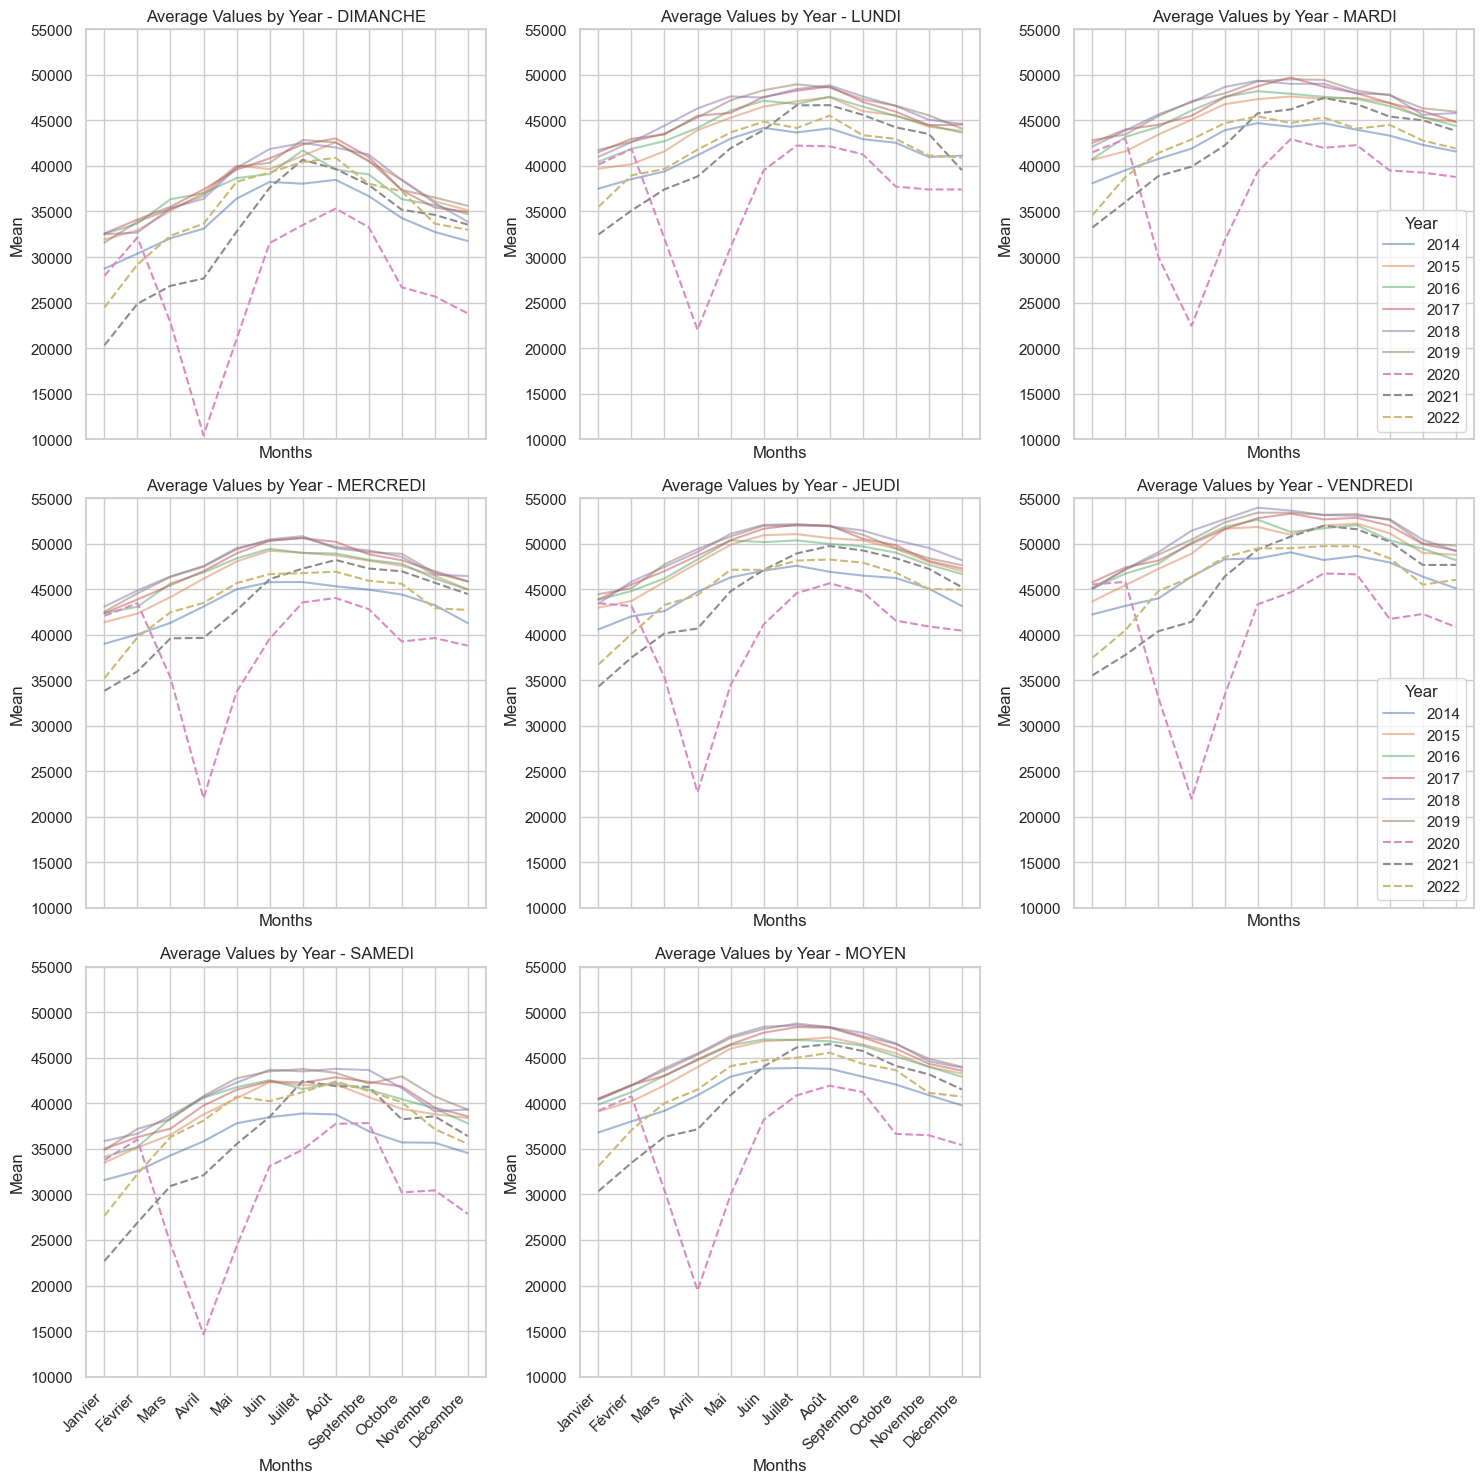

In [209]:
# Pivot the data to have days as columns and months as index
pivot_table = averages_fact84.pivot(index='MOIS', columns='ANNEE')

# Define the desired order of months
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Reorder the pivot table based on the month order
pivot_table = pivot_table.reindex(month_order)

# Get the unique years in the data
years = pivot_table.columns.get_level_values('ANNEE').unique()

# Calculate the number of subplots
num_plots = len(pivot_table.columns.get_level_values(0).unique())
num_rows = (num_plots - 1) // 3 + 1

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows), sharex=True)

# Flatten the axes array
axes = axes.flatten()

# Define line styles for highlighting
highlight_styles = ['--', '--', '--']

# set the range
y_min = 10000
y_max = 55000

# Plot a single curve per year for each day
for i, day in enumerate(pivot_table.columns.get_level_values(0).unique()):
    ax = axes[i]
    ax.set_ylim(y_min, y_max)
    for j, year in enumerate(years):
        line_style = highlight_styles[j % len(highlight_styles)] if year in [2020, 2021, 2022] else '-'
        line_alpha = 1.0 if year in [2020, 2021, 2022] else 0.5
        line_width = 2 if year in [2020, 2021, 2022] else 1
        ax.plot(pivot_table.index, pivot_table[(day, year)], label=f'{year}', linestyle=line_style, alpha=line_alpha)
    ax.set_ylabel('Mean')
    ax.set_title(f'Average Values by Year - {day}')
    ax.set_xticks(range(len(pivot_table.index)))  # Set x-ticks
    ax.set_xticklabels(pivot_table.index, rotation=45, ha='right')  # Set x-tick labels

    if i == 2 or i == 5:
        ax.legend(title='Year')
    else:
        ax.legend().set_visible(False)  # Hide legend for other subplots

    # Show x-axis labels for all subplots
    ax.set_xlabel('Months')

# Hide unused subplots
for j in range(num_plots, num_rows * 3):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()




Dimanche - Sunday;

Lundi - Monday;

Mardi - Tuesday;

Mercredi - Wednesday;

Jeudi - Thursday;

Vendredi - Friday;

Samedi - Saturday;

Moyen - Average


Mean of the days per month

> The 2 plots below are the same, but one is doing the mean calculation per day, and the other is using the column "MOYEN" which is the mean. just to confirm if it is correct or not the procedure. 

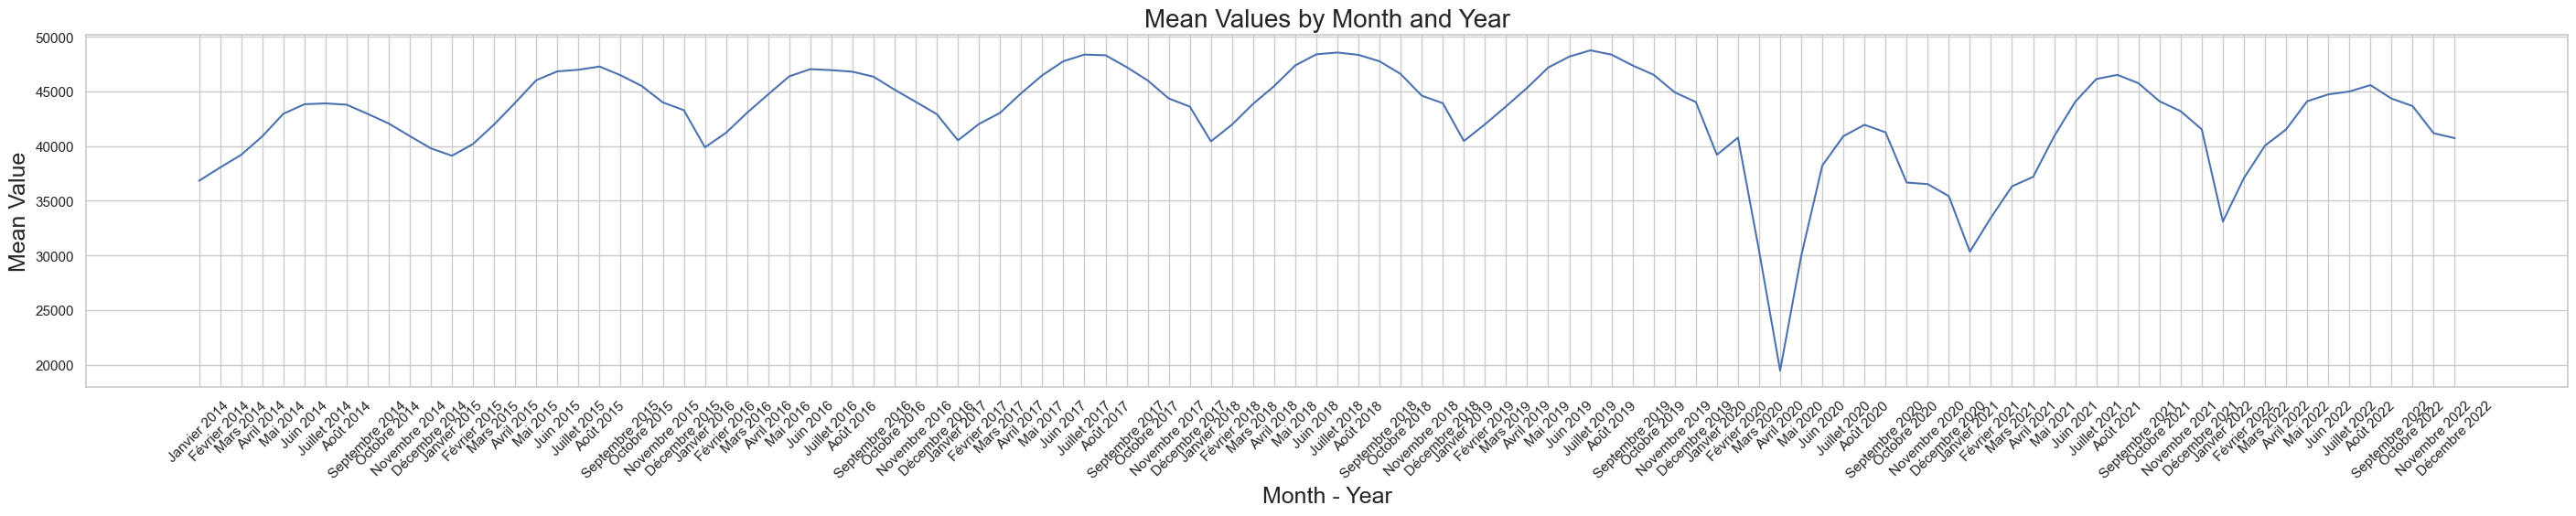

In [206]:
import matplotlib.pyplot as plt

# Define the order of months
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Create empty lists for x-axis labels and y-values
x_labels = []
y_values = []

# Iterate over each year and month
for year in range(2014, 2023):
    for month in month_order:
        data = averages_fact84[(averages_fact84['MOIS'] == month) & (averages_fact84['ANNEE'] == year)]
        if not data.empty:
            x_labels.append(f"{month} {year}")
            y_values.append(data[['DIMANCHE', 'LUNDI', 'MARDI', 'MERCREDI', 'JEUDI', 'VENDREDI', 'SAMEDI']].values[0].mean())

# Increase the figure size
plt.figure(figsize=(35, 5))
# Create the plot
plt.plot(x_labels, y_values)

# Set the x-axis label and ticks
plt.xlabel('Month - Year', fontsize = 18)
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Mean Value', fontsize = 18)

# Set the title of the plot
plt.title('Mean Values by Month and Year', fontsize = 20)

# Display the plot
plt.show()





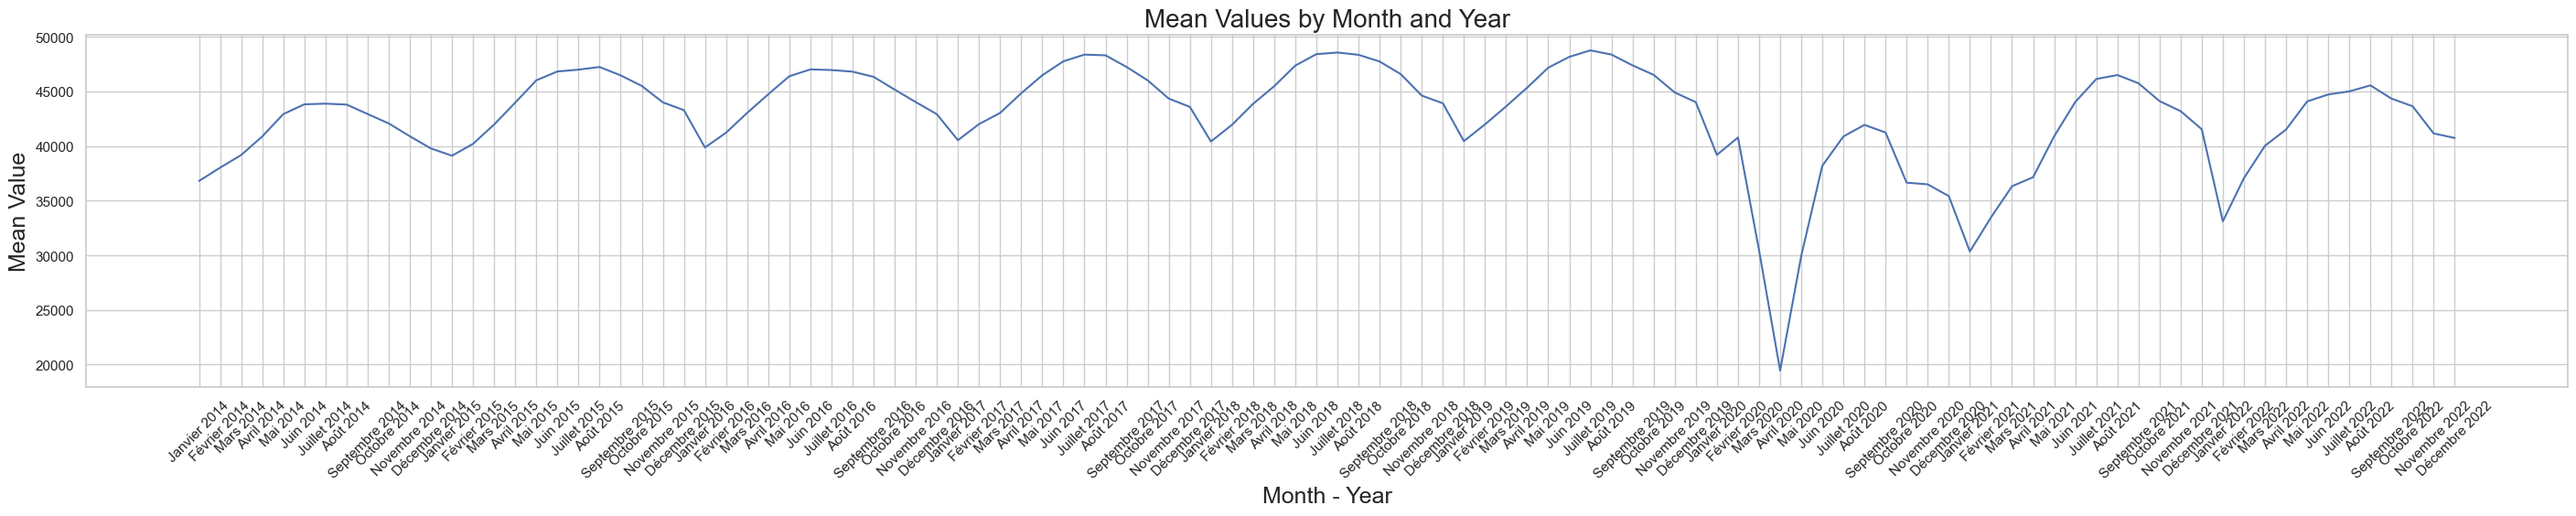

In [207]:
# Get the unique years from the data
years = averages_fact84['ANNEE'].unique()

# Sort the years in ascending order
years = sorted(years)

# Define the order of months
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Create empty lists for x-axis labels and y-values
x_labels = []
y_values = []

# Iterate over each year and month
for year in years:
    for month in month_order:
        x_labels.append(f"{month} {year}")
        data = averages_fact84[(averages_fact84['MOIS'] == month) & (averages_fact84['ANNEE'] == year)]
        if not data.empty:
            y_values.append(data['MOYEN'].values[0])
        else:
            y_values.append(None)

# Increase the figure size
plt.figure(figsize=(35, 5))

# Create the plot
plt.plot(x_labels, y_values)

# Set the x-axis label and ticks
plt.xlabel('Month - Year', fontsize = 18)
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Mean Value', fontsize = 18)

# Set the title of the plot
plt.title('Mean Values by Month and Year', fontsize = 20)

# Display the plot
plt.show()

##### Analysis for the horaire tab in the spreadsheets

> aggregated_data dataframe for the horaire data

> 2020 up to 2022 are highlighted

In [170]:
%%capture
# fact84 tab analysis
# Call the aggregate_filtered_data function
aggregated_data_hour = aggregate_filtered_data(folder_path, subfolders, 'VOIE', [13], 'horaire')

In [174]:
# Group by 'ANNEE' and 'HRE' columns and apply custom aggregation function to all day columns
averages_horaire = aggregated_data_hour.groupby(['ANNEE', 'HRE']).agg({
    'DIMANCHE': custom_mean,
    'SAMEDI': custom_mean,
    'OUVRABLE': custom_mean,
})

# Extract 'ANNEE' and 'MOIS' from the index and add them as columns
averages_horaire.reset_index(inplace=True)



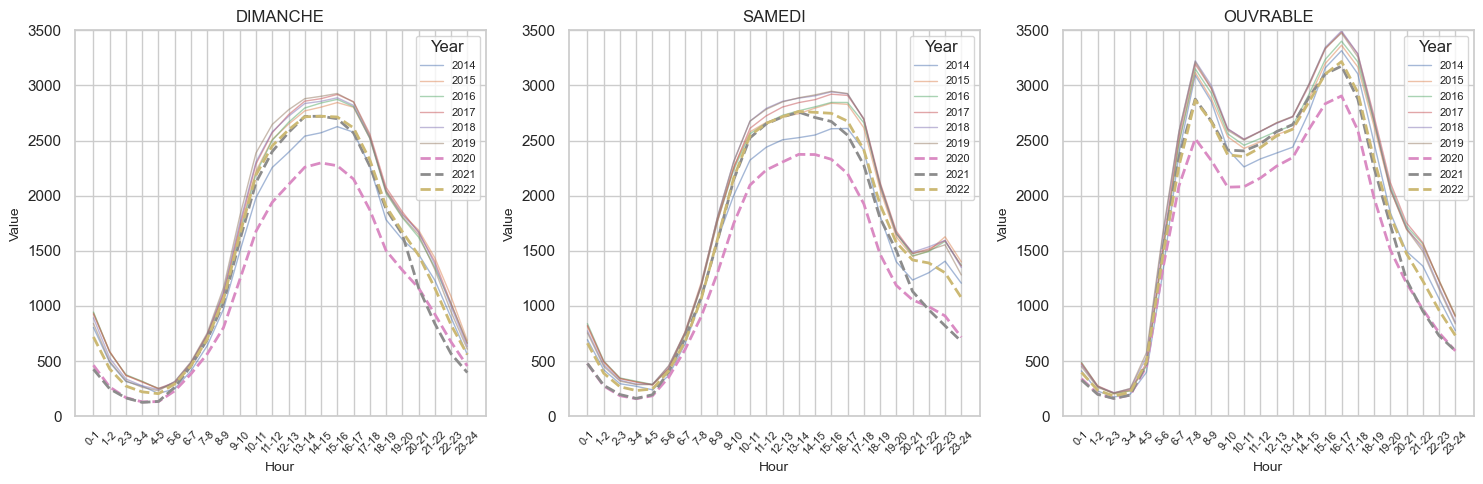

In [195]:
# Define the custom order of hours
hour_order = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12',
              '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# Filter the dataframe to include only relevant columns
df_filtered = averages_horaire[averages_horaire['HRE'] != 'Total']

# Get unique days
days = ['DIMANCHE', 'SAMEDI', 'OUVRABLE']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(days), figsize=(15, 5))

# Iterate over each day and create a subplot
for i, day in enumerate(days):
    ax = axes[i]
    
    # Filter data for the current day
    data = df_filtered[df_filtered[day].notnull()]
    
    # Convert 'HRE' column to ordered categorical data
    data['HRE'] = pd.Categorical(data['HRE'], categories=hour_order, ordered=True)
    data = data.sort_values('HRE')
    
    # Iterate over years
    for year in sorted(data['ANNEE'].unique()):
        # Filter data for the current year
        year_data = data[data['ANNEE'] == year]
        
        # Get hours and values for the current year and day
        hours = year_data['HRE']
        values = year_data[day]
        
        # Set line style and color for specific years
        if year in [2020, 2021, 2022]:
            line_style = '--'
            line_width = 2
            line_alpha = 1.0
        else:
            line_style = '-'
            line_width = 1
            line_alpha = 0.5
        
        # Plot the curve
        sns.lineplot(x=hours, y=values, ax=ax, label=str(year), linestyle=line_style,
                     linewidth=line_width, alpha=line_alpha)
    
    # Set subplot title and labels
    ax.set_title(day, fontsize=12)
    ax.set_xlabel('Hour', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.legend(title='Year', fontsize=8)
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.set_ylim(0,3500) # y-axis range

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


